##Loan Prediction

In [81]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [82]:
df = pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


`Data Cleaning`

In [83]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [85]:
df.drop("Loan_ID", inplace=True, axis="columns")

In [86]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [89]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [90]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [93]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [94]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [95]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [96]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [97]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [98]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [99]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [100]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [101]:
df['Gender'].replace({"Male":1, "Female": 0}, inplace=True)

In [102]:
df['Married'].replace({"Yes":1, "No":0}, inplace=True)

In [103]:
df['Education'].replace({"Graduate":1, "Not Graduate":0}, inplace=True)

In [104]:
df['Self_Employed'].replace({"Yes":1, "No":0}, inplace=True)

In [105]:
df['Property_Area'].replace({"Urban":0,"Rural":1, "Semiurban":2}, inplace=True)


In [106]:
df['Loan_Status'].replace({"Y":1, "N":0}, inplace=True)

In [107]:
df["Dependents"]=df["Dependents"].map({'0':0,'1':1,'2':2,'3+':3})

In [108]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [109]:
X = df.drop("Loan_Status", axis="columns").values
Y = df['Loan_Status'].values
X = X.astype('float64')
Y = np.array(Y, dtype=np.float)

In [110]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

`Scailing`

In [111]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()
X_scaled = mn.fit_transform(X)

In [112]:
X_scaled

array([[1.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        0.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.        ],
       [1.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        1.        ]])

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=5)

In [114]:
print(X_train.shape)

(433, 11)


In [115]:
X

array([[  1.,   0.,   0., ..., 360.,   1.,   0.],
       [  1.,   1.,   1., ..., 360.,   1.,   1.],
       [  1.,   1.,   0., ..., 360.,   1.,   0.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   2., ..., 360.,   1.,   0.],
       [  0.,   0.,   0., ..., 360.,   0.,   2.]])

In [116]:
Y

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0.

In [117]:
model = keras.models.Sequential([
  keras.layers.Dense(units=30, input_shape=(11,), activation="relu"),
  keras.layers.Dense(units=24, activation="relu"),
  keras.layers.Dense(units=12, activation="relu"),
  keras.layers.Dense(units=1, activation="sigmoid")
])

In [118]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [119]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5899
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.7061
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.6653
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5509 - accuracy: 0.7081
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.6786
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7334
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7137
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7790
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7980
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7818
Epoch 11/

In [120]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.7890


[0.5502187609672546, 0.78899085521698]

In [121]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Text(69.0, 0.5, 'Truth')

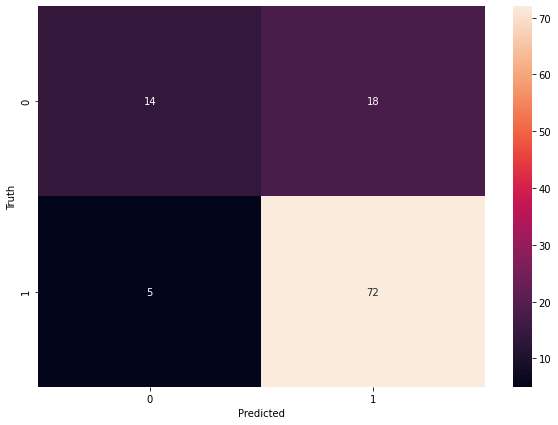

In [122]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')